In [15]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
import torch.utils.data as Data

import numpy as np

import tqdm

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
boston = datasets.load_boston()
X, y = boston.data, boston.target
X = X.astype(np.float32)
y = y.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

/Users/heemin/miniforge3/envs/test/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [17]:
boston['data'].shape

(506, 13)

In [18]:
X_train.shape

(404, 13)

In [19]:
y_train.shape

(404,)

### 404개의 data points <br>
### 13개의 독립변수

In [20]:
X_train[0]

array([1.4150e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01,
       6.1690e+00, 6.6000e+00, 5.7209e+00, 3.0000e+00, 2.3300e+02,
       1.7900e+01, 3.8337e+02, 5.8100e+00], dtype=float32)

In [21]:
y_train[:5]

array([25.3, 23.3,  7.2, 21.2, 11.7], dtype=float32)

### 종속변수는 미국 Boston에 속한 도시들의 70년대 중반 집들의 중간값 <br>
### data point는 도시 <br>
### 독립변수는 범죄율, 교통 편의성 등 <br>
### 10 = > $ 10K

In [22]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

In [23]:
class DataMaker(Data.Dataset):
    def __init__(self, X, y):
        # scaler = StandardScaler()
        self.targets = X.astype(np.float32)
        self.labels = y.astype(np.float32)
    
    def __getitem__(self, i):
        return self.targets[i, :], self.labels[i]

    def __len__(self):
        return len(self.targets)

In [24]:
class Model(nn.Module):
    def __init__(self, n_features):
        super(Model, self).__init__()
        self.Dense1 = nn.Linear(n_features, 64)
        self.Dense2 = nn.Linear(64, 64)
        self.Classifier = nn.Linear(64, 1)
        self.init_weights()
    
    def forward(self, x):
        x = F.relu(self.Dense1(x))
        x = F.relu(self.Dense2(x))
        return self.Classifier(x)
    
    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform(m.weight)
            m.bias.data.fill_(0)

In [25]:
boston['data'].shape

(506, 13)

In [26]:
n_samples, n_features = boston['data'].shape

In [27]:
model = Model(n_features)

In [28]:
train_set = DataMaker(X_train, y_train)
test_set = DataMaker(X_test, y_test)

In [29]:
batch_size = 64
train_loader = Data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = Data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [30]:
criterion = nn.MSELoss()

In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)

In [33]:
test_loader.dataset[0][0]

array([-0.3993397 ,  0.9231859 , -1.3008175 , -0.2932947 , -0.6940119 ,
        0.842863  ,  0.08287928, -0.30373   , -0.28494138, -1.0736655 ,
       -0.01783421,  0.43472734, -0.7282084 ], dtype=float32)

In [ ]:
model(test_loader.dataset[0][0])

In [35]:
n_epochs = 80
all_losses = []
for epoch in range(n_epochs):
    progress_bar = tqdm.notebook.tqdm(train_loader, leave=False)
    losses = []
    total = 0
    for inputs, target in progress_bar:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = criterion(y_pred, torch.unsqueeze(target,dim=1))

        loss.backward()
        
        optimizer.step()
        
        progress_bar.set_description(f'Loss: {loss.item():.3f}')
        
        losses.append(loss.item())
        total += 1

    epoch_loss = sum(losses) / total
    all_losses.append(epoch_loss)

    mess = f"{epoch+1}/{n_epochs}\nLoss: {all_losses[-1]:.3f}"
    tqdm.tqdm.write(mess)

  0%|          | 0/7 [00:00<?, ?it/s]

1/80
Loss: 529.989


  0%|          | 0/7 [00:00<?, ?it/s]

2/80
Loss: 111.869


  0%|          | 0/7 [00:00<?, ?it/s]

3/80
Loss: 22.669


  0%|          | 0/7 [00:00<?, ?it/s]

4/80
Loss: 16.962


  0%|          | 0/7 [00:00<?, ?it/s]

5/80
Loss: 14.158


  0%|          | 0/7 [00:00<?, ?it/s]

6/80
Loss: 13.005


  0%|          | 0/7 [00:00<?, ?it/s]

7/80
Loss: 11.679


  0%|          | 0/7 [00:00<?, ?it/s]

8/80
Loss: 12.916


  0%|          | 0/7 [00:00<?, ?it/s]

9/80
Loss: 11.380


  0%|          | 0/7 [00:00<?, ?it/s]

10/80
Loss: 10.890


  0%|          | 0/7 [00:00<?, ?it/s]

11/80
Loss: 10.369


  0%|          | 0/7 [00:00<?, ?it/s]

12/80
Loss: 9.145


  0%|          | 0/7 [00:00<?, ?it/s]

13/80
Loss: 9.194


  0%|          | 0/7 [00:00<?, ?it/s]

14/80
Loss: 8.665


  0%|          | 0/7 [00:00<?, ?it/s]

15/80
Loss: 8.690


  0%|          | 0/7 [00:00<?, ?it/s]

16/80
Loss: 8.814


  0%|          | 0/7 [00:00<?, ?it/s]

17/80
Loss: 8.381


  0%|          | 0/7 [00:00<?, ?it/s]

18/80
Loss: 8.014


  0%|          | 0/7 [00:00<?, ?it/s]

19/80
Loss: 8.122


  0%|          | 0/7 [00:00<?, ?it/s]

20/80
Loss: 7.770


  0%|          | 0/7 [00:00<?, ?it/s]

21/80
Loss: 7.794


  0%|          | 0/7 [00:00<?, ?it/s]

22/80
Loss: 7.817


  0%|          | 0/7 [00:00<?, ?it/s]

23/80
Loss: 7.523


  0%|          | 0/7 [00:00<?, ?it/s]

24/80
Loss: 7.200


  0%|          | 0/7 [00:00<?, ?it/s]

25/80
Loss: 8.028


  0%|          | 0/7 [00:00<?, ?it/s]

26/80
Loss: 7.447


  0%|          | 0/7 [00:00<?, ?it/s]

27/80
Loss: 8.186


  0%|          | 0/7 [00:00<?, ?it/s]

28/80
Loss: 6.913


  0%|          | 0/7 [00:00<?, ?it/s]

29/80
Loss: 7.364


  0%|          | 0/7 [00:00<?, ?it/s]

30/80
Loss: 7.032


  0%|          | 0/7 [00:00<?, ?it/s]

31/80
Loss: 9.535


  0%|          | 0/7 [00:00<?, ?it/s]

32/80
Loss: 7.564


  0%|          | 0/7 [00:00<?, ?it/s]

33/80
Loss: 7.217


  0%|          | 0/7 [00:00<?, ?it/s]

34/80
Loss: 6.600


  0%|          | 0/7 [00:00<?, ?it/s]

35/80
Loss: 6.189


  0%|          | 0/7 [00:00<?, ?it/s]

36/80
Loss: 5.894


  0%|          | 0/7 [00:00<?, ?it/s]

37/80
Loss: 5.884


  0%|          | 0/7 [00:00<?, ?it/s]

38/80
Loss: 5.507


  0%|          | 0/7 [00:00<?, ?it/s]

39/80
Loss: 6.190


  0%|          | 0/7 [00:00<?, ?it/s]

40/80
Loss: 6.273


  0%|          | 0/7 [00:00<?, ?it/s]

41/80
Loss: 5.763


  0%|          | 0/7 [00:00<?, ?it/s]

42/80
Loss: 5.476


  0%|          | 0/7 [00:00<?, ?it/s]

43/80
Loss: 5.009


  0%|          | 0/7 [00:00<?, ?it/s]

44/80
Loss: 5.581


  0%|          | 0/7 [00:00<?, ?it/s]

45/80
Loss: 5.912


  0%|          | 0/7 [00:00<?, ?it/s]

46/80
Loss: 5.427


  0%|          | 0/7 [00:00<?, ?it/s]

47/80
Loss: 5.265


  0%|          | 0/7 [00:00<?, ?it/s]

48/80
Loss: 4.933


  0%|          | 0/7 [00:00<?, ?it/s]

49/80
Loss: 4.975


  0%|          | 0/7 [00:00<?, ?it/s]

50/80
Loss: 4.880


  0%|          | 0/7 [00:00<?, ?it/s]

51/80
Loss: 4.716


  0%|          | 0/7 [00:00<?, ?it/s]

52/80
Loss: 4.925


  0%|          | 0/7 [00:00<?, ?it/s]

53/80
Loss: 4.587


  0%|          | 0/7 [00:00<?, ?it/s]

54/80
Loss: 4.606


  0%|          | 0/7 [00:00<?, ?it/s]

55/80
Loss: 4.473


  0%|          | 0/7 [00:00<?, ?it/s]

56/80
Loss: 4.492


  0%|          | 0/7 [00:00<?, ?it/s]

57/80
Loss: 4.266


  0%|          | 0/7 [00:00<?, ?it/s]

58/80
Loss: 4.564


  0%|          | 0/7 [00:00<?, ?it/s]

59/80
Loss: 4.616


  0%|          | 0/7 [00:00<?, ?it/s]

60/80
Loss: 4.733


  0%|          | 0/7 [00:00<?, ?it/s]

61/80
Loss: 4.277


  0%|          | 0/7 [00:00<?, ?it/s]

62/80
Loss: 4.041


  0%|          | 0/7 [00:00<?, ?it/s]

63/80
Loss: 4.316


  0%|          | 0/7 [00:00<?, ?it/s]

64/80
Loss: 3.992


  0%|          | 0/7 [00:00<?, ?it/s]

65/80
Loss: 4.321


  0%|          | 0/7 [00:00<?, ?it/s]

66/80
Loss: 3.756


  0%|          | 0/7 [00:00<?, ?it/s]

67/80
Loss: 3.877


  0%|          | 0/7 [00:00<?, ?it/s]

68/80
Loss: 3.572


  0%|          | 0/7 [00:00<?, ?it/s]

69/80
Loss: 4.090


  0%|          | 0/7 [00:00<?, ?it/s]

70/80
Loss: 4.409


  0%|          | 0/7 [00:00<?, ?it/s]

71/80
Loss: 4.271


  0%|          | 0/7 [00:00<?, ?it/s]

72/80
Loss: 3.228


  0%|          | 0/7 [00:00<?, ?it/s]

73/80
Loss: 3.662


  0%|          | 0/7 [00:00<?, ?it/s]

74/80
Loss: 3.365


  0%|          | 0/7 [00:00<?, ?it/s]

75/80
Loss: 3.322


  0%|          | 0/7 [00:00<?, ?it/s]

76/80
Loss: 3.293


  0%|          | 0/7 [00:00<?, ?it/s]

77/80
Loss: 3.159


  0%|          | 0/7 [00:00<?, ?it/s]

78/80
Loss: 3.444


  0%|          | 0/7 [00:00<?, ?it/s]

79/80
Loss: 3.331


  0%|          | 0/7 [00:00<?, ?it/s]

80/80
Loss: 3.213


## Loss 값 변화 살펴보기

In [80]:
import matplotlib.pyplot as plt

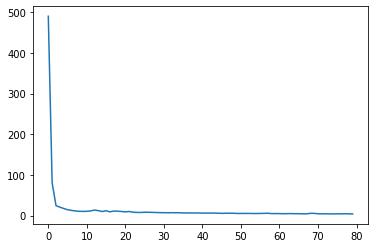

In [81]:
plt.plot(all_losses)


In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
y_pred = []
y_true = []
model.train(False)
for inputs, targets in test_loader:
    y_pred.extend(model(inputs).data.numpy())
    y_true.extend(targets.numpy())

In [84]:
print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("R^2:", r2_score(y_true, y_pred))

MAE: 1.978754
MSE: 6.693433
R^2: 0.9322714831068823
